In [17]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
sonuc=pd.read_csv("/Users/erdemtasdelen/Downloads/python.csv")
print(sonuc)

    Unnamed: 0    Hisse     Gelir  Oynaklık
0            0  YKBNK_x  0.582007  0.473054
1            1    AKBNK  0.726252  0.486956
2            2    ASELS  1.030202  0.429474
3            3    ASTOR  0.546435  0.526696
4            4    BIMAS  0.665939  0.416328
5            5    CIMSA  0.844924  0.494830
6            6    EKGYO  0.477729  0.483849
7            7    ENKAI  0.561113  0.394026
8            8    EREGL  0.249204  0.371385
9            9    FROTO  0.401626  0.375777
10          10    GARAN  0.807637  0.457170
11          11    HEKTS -0.462882  0.446333
12          12    ISCTR  0.564579  0.460853
13          13    KCHOL  0.446254  0.399952
14          14    KOZAL  0.301699  0.482662
15          15    KRDMD  0.384043  0.460730
16          16    MGROS  0.627782  0.389845
17          17    PETKM  0.228242  0.413240
18          18    PGSUS  0.560574  0.408942
19          19    SAHOL  0.461797  0.408255
20          20     SASA -0.034201  0.465839
21          21     SISE  0.05131

In [7]:
X = sonuc[["Gelir", "Oynaklık"]]

ms=MinMaxScaler()
X_scaled=ms.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=["Gelir","Oynaklık"])
print(X.describe())

           Gelir   Oynaklık
count  30.000000  30.000000
mean    0.638147   0.459610
std     0.197866   0.273752
min     0.000000   0.000000
25%     0.570176   0.236223
50%     0.680729   0.464888
75%     0.749644   0.670384
max     1.000000   1.000000


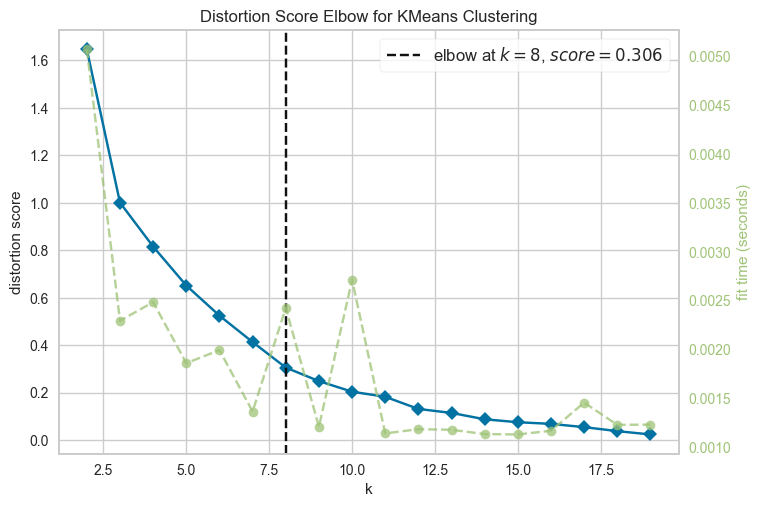

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
kmodel=KMeans(random_state=0)
grafik=KElbowVisualizer(kmodel,k=(2,20))
grafik.fit(X)
grafik.poof()

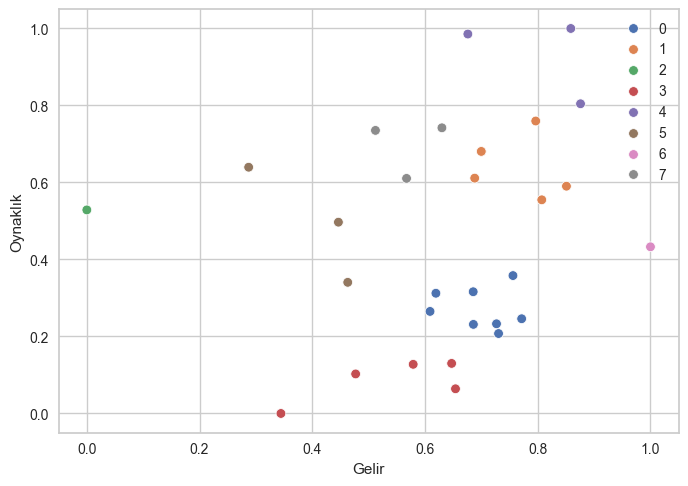

In [13]:
kmodel=KMeans(n_clusters=8, random_state=0)
kfit=kmodel.fit(X)
labels=kfit.labels_

sns.scatterplot(x="Gelir", y="Oynaklık", data=X, hue=labels, palette="deep")
plt.show()

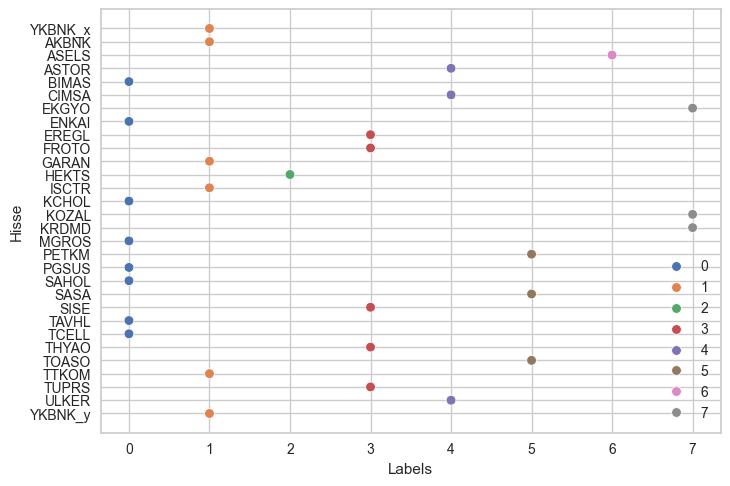

In [15]:
sonuc["Labels"]=labels
sns.scatterplot(x="Labels", y="Hisse", data=sonuc, hue=labels, palette="deep")
plt.show()


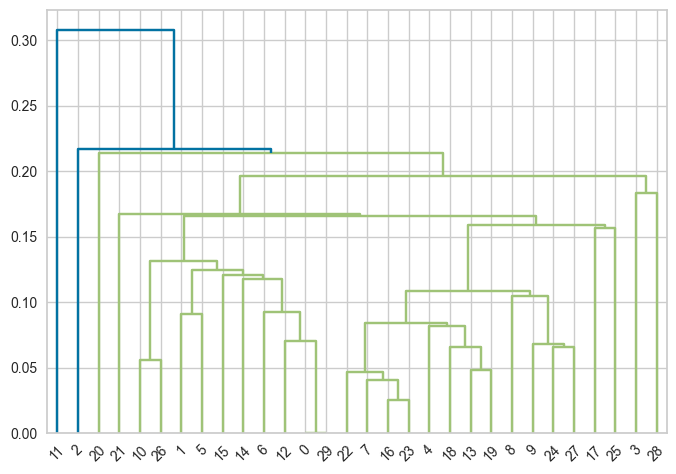

In [18]:
hc=linkage(X,method="single")
dendrogram(hc)
plt.show()

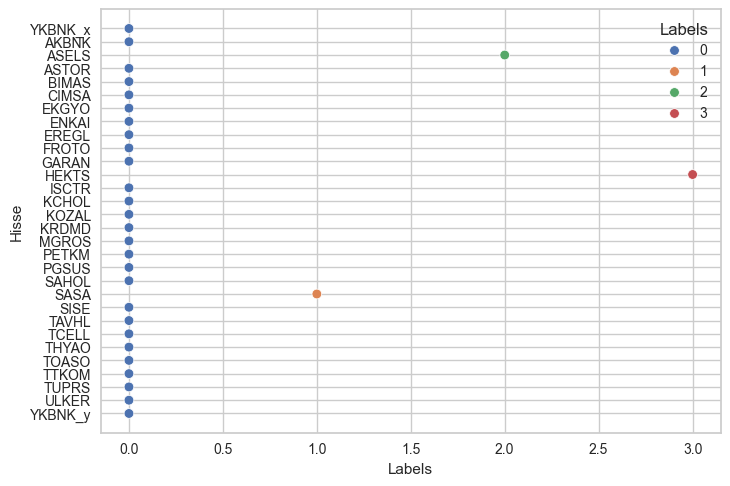

In [21]:
model=AgglomerativeClustering(n_clusters=4, linkage="single")
tahmin=model.fit_predict(X)
labels=model.labels_

sonuc["Labels"]=labels
sns.scatterplot(x="Labels", y="Hisse", data=sonuc, hue="Labels", palette="deep")
plt.show()